In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pyplot
import seaborn as sns

In [3]:
data = pd.read_csv("pokemon_dataset.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          843 non-null    int64  
 1   PokemonName         843 non-null    object 
 2   Type1               843 non-null    object 
 3   Type2               843 non-null    object 
 4   HP                  843 non-null    int64  
 5   Attack              843 non-null    int64  
 6   Defense             843 non-null    int64  
 7   CP                  843 non-null    int64  
 8   Fast Attack         843 non-null    object 
 9   DPS Fast Attack     843 non-null    float64
 10  Fast Type           843 non-null    object 
 11  Charged Attack      843 non-null    object 
 12  DPS Charged Attack  843 non-null    float64
 13  Charged Type        843 non-null    object 
 14  Rank                843 non-null    object 
dtypes: float64(2), int64(5), object(8)
memory usage: 98.9+ KB

In [5]:
data = data.replace({"Rank": {'S': 10,'A+':9,'A':8,'B+':7,'B':6,'C':5,'F':0}})

In [6]:
strong_bois_names = data.loc[data["Rank"] == 7, "PokemonName"]
print(strong_bois_names)

67        Machamp
93         Gengar
98        Kingler
145       Moltres
148     Dragonite
242        Raikou
249         Ho-oh
259      Swampert
281     Gardevoir
285       Breloom
380        Latios
397     Staraptor
406      Roserade
429     Honchkrow
460       Weavile
461     Magnezone
465    Electivire
470       Glaceon
481         Azelf
482        Dialga
483        Palkia
522      Gigalith
551    Darmanitan
567       Zoroark
642        Kyurem
648    Chesnaught
691     Tyrantrum
710       Xerneas
731      Vikavolt
754      Tsareena
778      Nihilego
780     Pheromosa
805        Zarude
840    Baxcalibur
Name: PokemonName, dtype: object


In [7]:
data = data.drop("Unnamed: 0", axis=1)

In [8]:
data.Rank.unique()

array([ 0,  6,  5,  7,  8,  9, 10], dtype=int64)

In [9]:
data["Rank"].value_counts()

0     713
5      39
7      34
6      31
8      17
9       7
10      2
Name: Rank, dtype: int64

In [10]:
data["Charge Move Stab"] = ((data["Type1"].replace("None", 0) == data["Charged Type"]) |
                                (data["Type2"].replace("None", 0) == data["Charged Type"])).astype(int)

data["Fast Move Stab"] = ((data["Type1"].replace("None", 0) == data["Fast Type"]) |
                                (data["Type2"].replace("None", 0) == data["Fast Type"])).astype(int)

In [11]:
columns_byebye = ["PokemonName","Type1","Type2","Fast Attack","Fast Type","Charged Attack","Charged Type"]

In [12]:
data = data.drop(columns=columns_byebye)

In [13]:
data

,HP,Attack,Defense,CP,DPS Fast Attack,DPS Charged Attack,Rank,Charge Move Stab,Fast Move Stab
0,128,118,111,1115,0.00,0.00,0,0,0
1,155,151,143,1699,0.00,0.00,0,0,0
2,190,198,189,2720,11.67,38.46,6,1,1
3,118,116,93,980,0.00,0.00,0,0,0
4,151,158,126,1653,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...
838,163,134,86,1247,0.00,0.00,0,0,0
839,207,173,128,2092,0.00,0.00,0,0,0
840,229,269,167,3541,8.00,33.33,7,1,1
841,128,121,122,1188,0.00,0.00,0,0,0


In [14]:
X = data.drop(["Rank"], axis=1)
y = data["Rank"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [16]:
train_data = X_train.join(y_train)

array([[<AxesSubplot: title={'center': 'HP'}>,
        <AxesSubplot: title={'center': 'Attack'}>,
        <AxesSubplot: title={'center': 'Defense'}>],
       [<AxesSubplot: title={'center': 'CP'}>,
        <AxesSubplot: title={'center': 'DPS Fast Attack'}>,
        <AxesSubplot: title={'center': 'DPS Charged Attack'}>],
       [<AxesSubplot: title={'center': 'Charge Move Stab'}>,
        <AxesSubplot: title={'center': 'Fast Move Stab'}>,
        <AxesSubplot: title={'center': 'Rank'}>]], dtype=object)

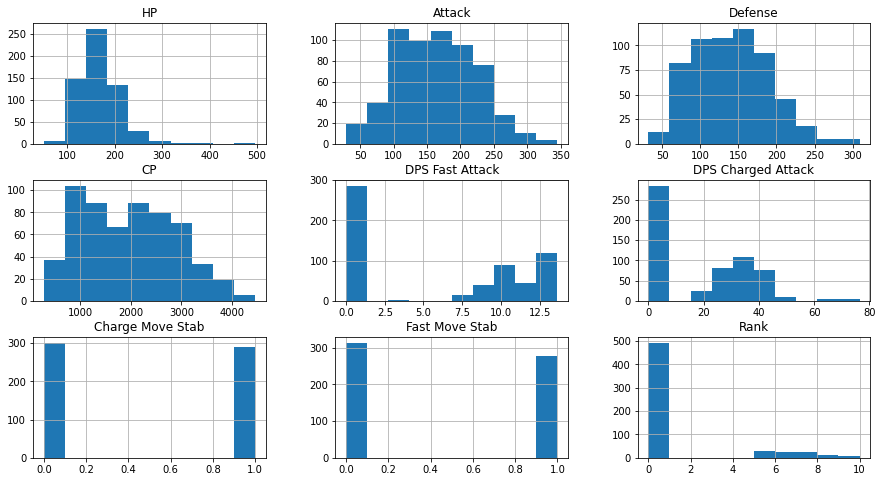

In [17]:
train_data.hist(figsize=(15,8))

<AxesSubplot: >

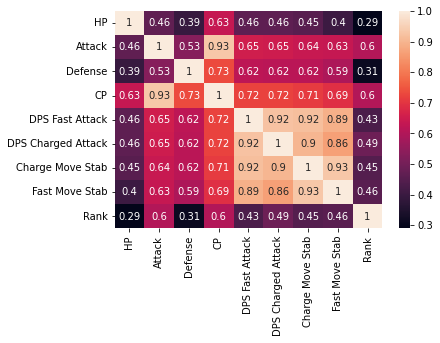

In [18]:
sns.heatmap(train_data.corr(), annot=True)

In [19]:
train_data

,HP,Attack,Defense,CP,DPS Fast Attack,DPS Charged Attack,Charge Move Stab,Fast Move Stab,Rank
276,155,185,123,1913,10.00,22.92,1,1,0
143,207,192,236,3051,10.00,27.27,1,1,0
722,155,167,145,1874,0.00,0.00,0,0,0
839,207,173,128,2092,0.00,0.00,0,0,0
146,121,118,91,997,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...
487,260,152,237,2745,12.50,44.44,1,1,0
608,183,284,172,3593,13.64,43.75,1,1,6
696,167,164,133,1834,8.33,26.00,1,1,0
494,163,115,85,1083,0.00,0.00,0,0,0


In [20]:
lr = LogisticRegression(multi_class="multinomial", solver='lbfgs')
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

c:\Users\Robva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8616600790513834

In [21]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=50)

forest.fit(X_train, y_train)
forest.score(X_test,y_test)

0.6046571241641073

In [22]:
forest = RandomForestClassifier(n_estimators=60)
forest.fit(X_train, y_train)
forest.score(X_train, y_train)

0.9983050847457627

In [23]:
def ModelScores(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return model.score(X_train,y_train)

In [24]:
kf = StratifiedKFold(n_splits=10)

In [25]:
scoresLR = []
scoresRF = []
scoresSVM = []
scoresKNN = []
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scoresLR.append(ModelScores(LogisticRegression(multi_class="multinomial", solver='lbfgs'), X_train, X_test, y_train, y_test))
    scoresRF.append(ModelScores(RandomForestClassifier(), X_train, X_test, y_train, y_test))
    scoresSVM.append(ModelScores(svm.SVC(), X_train, X_test, y_train, y_test))
    scoresKNN.append(ModelScores(KNeighborsClassifier(), X_train, X_test, y_train, y_test))

c:\Users\Robva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Robva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Robva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

In [26]:
scoresLR
avg = sum(scoresLR) / len(scoresLR)
print(avg)

0.8562017444144324


In [27]:
scoresRF

[0.9986807387862797,
 1.0,
 0.9986807387862797,
 0.9986824769433466,
 0.9986824769433466,
 0.9986824769433466,
 0.9986824769433466,
 0.9986824769433466,
 0.9986824769433466,
 1.0]

In [31]:
scoresSVM
avg = sum(scoresSVM) / len(scoresSVM)
print(avg)

0.8456570407528305


In [32]:
scoresKNN
avg = sum(scoresKNN) / len(scoresKNN)
print(avg)

0.8861204681899876
